In [1]:
import pandas as pd
import wandb
from tqdm.notebook import tqdm
import pickle
from os.path import exists
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.ticker import MaxNLocator
#...

font = {'family' : 'times',
        'size'   : 14}

matplotlib.rc('font', **font)

/Users/dehuang/.pyenv/versions/3.9.6/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Get Data

In [2]:
class Experiment:
    def __init__(self, run):
        self.name = run.name
        self.config = run.config
        self.summary = run.summary
        self.history = run.history()
        self.tags = run.tags
        self.run = run
        
    def get_id(self):
        return (self.config['formula'],self.config['mol_idx'])
        
    def get_history(self):
        return np.array(list(self.history['additional_steps'])).cumsum()

In [3]:
def fetch(project):
    api = wandb.Api()
    entity = "bogp"
    hdata = []
    runs = api.runs(entity + "/" + project)
    for run in tqdm(runs):
        try:
            hdata.append(Experiment(run))
        except:
            pass
    return hdata

In [4]:
raw = fetch("scale_master")

  0%|          | 0/638 [00:00<?, ?it/s]

wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.
wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.
wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.
wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.


# Check Data

In [5]:
# Loop through each Experiment object in raw and print details
for exp in raw:
    try:
        print(f"Name: {exp.name}")
        print(f"Config: {exp.config}")
        print(f"Summary: {exp.summary}")
        print(f"Tags: {exp.tags}")
        print(f"Run Group: {exp.run.group}")  # Assuming run.group gives the run group
        print(f"ID: {exp.get_id()}")
        print(f"History: {exp.get_history()}")
    except KeyError as e:
        print(f"KeyError encountered: {e}")

Name: unet_svgd_8_particles_1_devices
Config: {'model': 'unet', 'train': 'svgd', 'view_size': 8, 'batch_size': 50, 'cache_size': 8, 'num_device': 1, 'dataset size': 2000, 'weight_decay': 0, 'learning_rate': 0.001, 'num_particles': 8}
Summary: {'_runtime': 97.0159821510315, '_timestamp': 1695853631.0038612, 'epoch_loss': 0.4547119140625, 'average time': 9.562483062000137, 'time': 9.03948745300022, '_step': 10, '_wandb': {'runtime': 96}}
Tags: []
Run Group: baseline2
KeyError encountered: 'formula'
Name: unet_svgd_4_particles_1_devices
Config: {'model': 'unet', 'train': 'svgd', 'view_size': 4, 'batch_size': 50, 'cache_size': 4, 'num_device': 1, 'dataset size': 2000, 'weight_decay': 0, 'learning_rate': 0.001, 'num_particles': 4}
Summary: {'_step': 10, '_wandb': {'runtime': 31}, '_runtime': 32.20758533477783, '_timestamp': 1695853510.6581554, 'epoch_loss': 0.4492186903953552, 'average time': 3.0836200247000307, 'time': 2.951632457999949}
Tags: []
Run Group: baseline2
KeyError encountered: 

KeyError encountered: 'formula'
Name: transformer_svgd_push_8_particles_1_devices
Config: {'model': 'transformer', 'train': 'svgd_push', 'view_size': 8, 'batch_size': 128, 'cache_size': 8, 'num_device': 1, 'dataset size': 5120, 'weight_decay': 0, 'learning_rate': 0.001, 'num_particles': 8}
Summary: {'time': 15.784655780998946, '_step': 9, '_wandb': {'runtime': 172}, '_runtime': 171.2777636051178, '_timestamp': 1695436403.1148436, 'leader_loss:': 2.158881664276123}
Tags: []
Run Group: a5000
KeyError encountered: 'formula'
Name: transformer_svgd_push_4_particles_1_devices
Config: {'model': 'transformer', 'train': 'svgd_push', 'view_size': 4, 'batch_size': 128, 'cache_size': 4, 'num_device': 1, 'dataset size': 5120, 'weight_decay': 0, 'learning_rate': 0.001, 'num_particles': 4}
Summary: {'_timestamp': 1695436213.340567, 'leader_loss:': 1.926116704940796, 'time': 6.102627055004632, '_step': 9, '_wandb': {'runtime': 74}, '_runtime': 73.98066520690918}
Tags: []
Run Group: a5000
KeyError enco

Run Group: default
KeyError encountered: 'formula'
Name: unet_ensemble_push_4_particles_4_devices
Config: {'model': 'unet', 'view_size': 4, 'batch_size': 50, 'cache_size': 1, 'num_device': 4, 'dataset size': 2000, 'weight_decay': 0, 'learning_rate': 0.001, 'num_particles': 4}
Summary: {'time': 0.9843046579971996, '_step': 9, '_wandb': {'runtime': 16}, '_runtime': 17.001028299331665, '_timestamp': 1695238602.1815712, 'leader_loss:': 0.1390305459499359}
Tags: []
Run Group: default
KeyError encountered: 'formula'
Name: transformer_svgd_push_8_particles_1_devices
Config: {'model': 'transformer', 'view_size': 8, 'batch_size': 128, 'cache_size': 8, 'num_device': 1, 'dataset size': 5120, 'weight_decay': 0, 'learning_rate': 0.001, 'num_particles': 8}
Summary: {'_wandb': {'runtime': 289}, '_runtime': 288.83175230026245, '_timestamp': 1695238739.2583203, 'leader_loss:': 2.1682724952697754, 'time': 22.404681827994864, '_step': 9}
Tags: []
Run Group: default
KeyError encountered: 'formula'
Name: t

# Extract Data

In [10]:
def get_exp(raw_exp, model):
    def test_method(method, exp):
        if method == "mswag_push" and "mswag_push" in exp.name:
            return True
        elif method == "svgd_push" and "svgd_push" in exp.name:
            return True
        elif method == "ensemble_push" and "ensemble_push" in exp.name:
            return True
        elif method == "ensemble" and "ensemble" in exp.name:
            return True
        elif method == "svgd" and "svgd" in exp.name:
            return True
        elif method == "mswag" and "mswag" in exp.name:
            return True
        else:
            return False
            
    exps = {
        'ensemble_push': {dev: [] for dev in [1, 2, 4, "baseline"]},  # Added 3 for baseline
        'mswag_push': {dev: [] for dev in [1, 2, 4, "baseline"]},
        'svgd_push': {dev: [] for dev in [1, 2, 4, "baseline"]}
    } 

    for exp in raw_exp:
        num_device = exp.config["num_device"]

        # For baseline methods
        if exp.run.group == "baseline2" and exp.config["model"] == model:
            if test_method("ensemble", exp):
                exps['ensemble_push']["baseline"] += [exp]  
                #print(f'Loaded {len(exps["ensemble_push"][3])} baseline ensemble_push experiments for model {model}.')
            elif test_method("svgd", exp):
                exps['svgd_push']["baseline"] += [exp]  
            elif test_method("mswag", exp):
                exps['mswag_push']["baseline"] += [exp]  
                
        # For default methods
        elif exp.run.group == "a5000" and exp.config["model"] == model:
            if test_method("ensemble_push", exp):
                exps['ensemble_push'][num_device] += [exp]
            elif test_method("mswag_push", exp):
                exps['mswag_push'][num_device] += [exp]
            elif test_method("svgd_push", exp):
                exps['svgd_push'][num_device] += [exp]
                
    return exps


In [11]:
import numpy as np
import matplotlib.pyplot as plt

def my_plot(model, method, exps, x_unit="", y_unit="", norm=False):
    plt.rcParams["font.family"] = "DejaVu Sans"
    
    def _one(exps, mswag):
        times = {}
        for exp in exps:
            try:
                if mswag:
                    times[exp.config["num_particles"]] = np.log2(exp.history["swag_epoch_time"].mean())
                else:
                    times[exp.config["num_particles"]] = np.log2(exp.history["time"].mean())
            except:
                pass

        myKeys = list(times.keys())
        myKeys.sort()
        ts = [times[i] for i in myKeys]
        return ts, myKeys

    plt.figure()
    
    if 1 in exps[method]:
        time_1, particles_1 = _one(exps[method][1], method == "mswag_push")
        plt.plot(np.log2(particles_1), time_1, marker='o', linestyle='-', label="1 Device")
    if 2 in exps[method]:
        time_2, particles_2 = _one(exps[method][2], method == "mswag_push")
        plt.plot(np.log2(particles_2), time_2, marker='s', linestyle='--', label="2 Devices")
    if 4 in exps[method]:
        time_4, particles_4 = _one(exps[method][4], method == "mswag_push")
        plt.plot(np.log2(particles_4), time_4, marker='^', linestyle=':', label="4 Devices")
    if "baseline" in exps[method]:
        time_3, particles_3 = _one(exps[method]["baseline"], method == "mswag_push")
        plt.plot(np.log2(particles_3), time_3, marker='x', linestyle='-.', label="Baseline")  # Baseline
    
    
    plt.grid(True)  # Adding grid lines
    
    plt.ylim(-2, 8)
    plt.yticks(np.arange(11), [r'$2^{-2}$', r'$2^{-1}$', r'$2^{0}$', r'$2^1$', r'$2^2$', r'$2^3$', r'$2^4$', r'$2^5$', r'$2^6$', r'$2^7$', r'$2^8$'])
    plt.xticks(np.arange(6), [r'$2^0$', r'$2^1$', r'$2^2$', r'$2^3$', r'$2^4$', r'$2^5$'])
    plt.ylabel(f'Seconds ({y_unit} log scale)')
    plt.xlabel(f'Particles ({x_unit} log scale)')
    
    if method == "ensemble_push":
        method_title = "Ensemble"
    elif method == "mswag_push":
        method_title = "MSWAG"
    else:
        method_title = "Stein VGD"
    
    plt.title(f"{method_title} Push Scaling on {model}")
    plt.legend(loc='upper left') 
    plt.savefig(f'media/{model}_{method}.pdf', format='pdf')


# Example usage:
# my_plot("ModelName", "mswag_push", your_experiments_data, x_unit="Particles", y_unit="Seconds")


In [12]:
models = ["schnet", "cgcnn", "resnet", "transformer", "unet"]
methods = ["ensemble_push", "mswag_push", "svgd_push"]

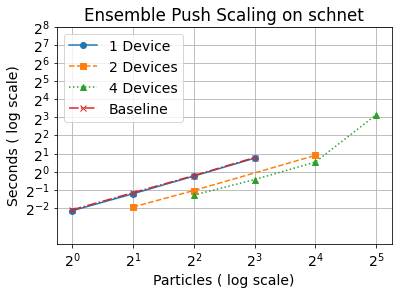

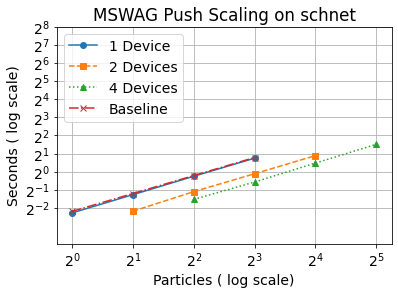

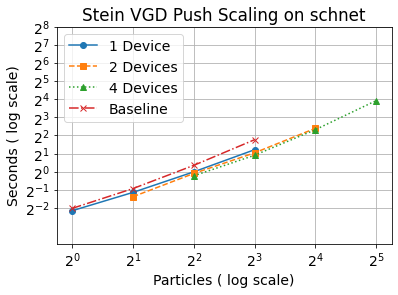

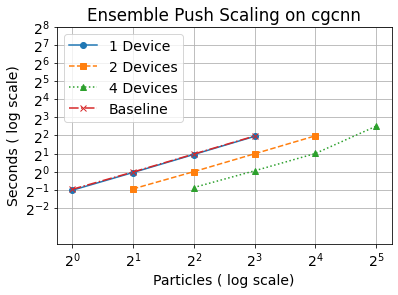

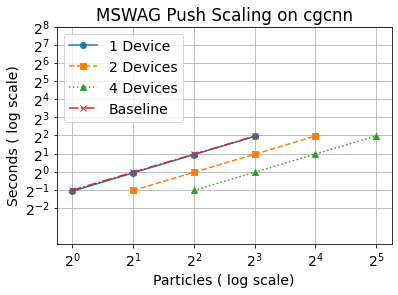

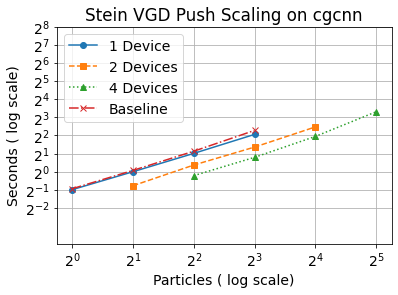

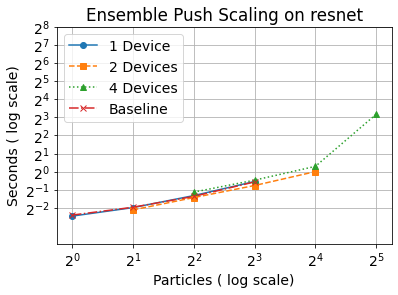

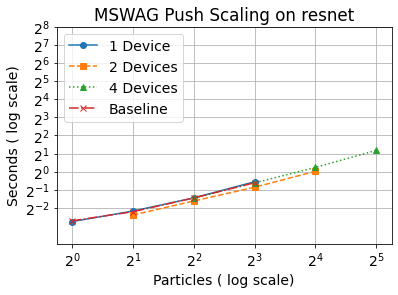

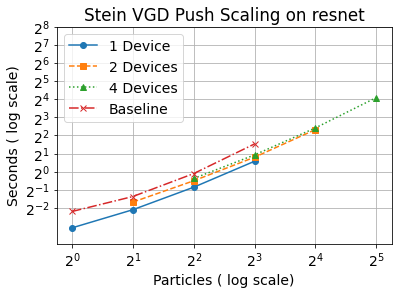

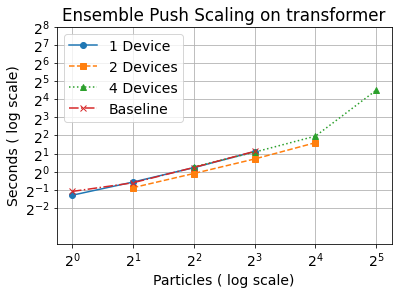

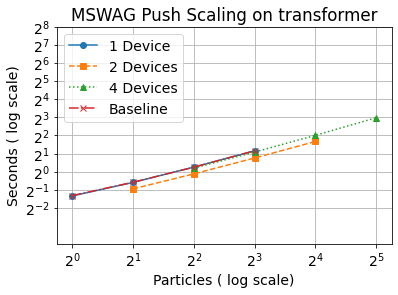

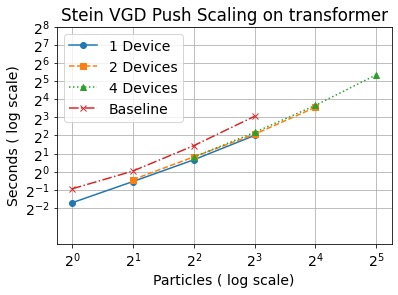

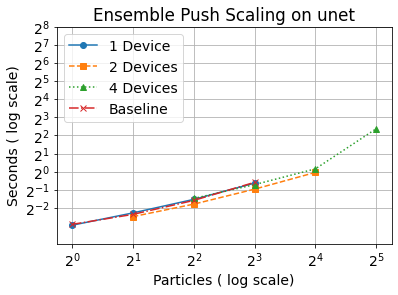

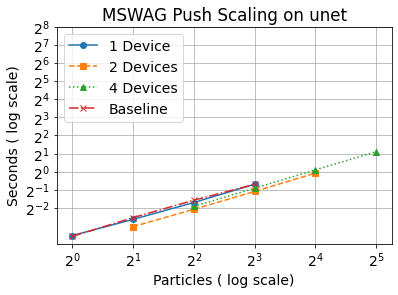

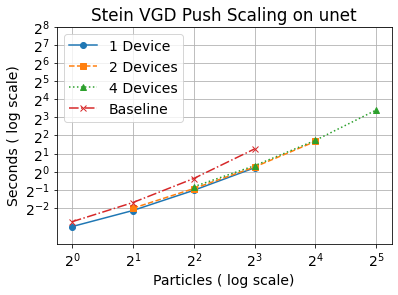

In [13]:
for model in models:
    for method in methods:
        exps = get_exp(raw, model)
        my_plot(model, method, exps, norm=True)